### Text Analysis on 800-53 Mapping

Sources:

https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps
https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/

In [112]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from operator import itemgetter
nlp = spacy.load('en_core_web_sm')

In [74]:
data = pd.read_csv("800-53 Mapping Mar 1.csv")
data.head()

,Identity,Device,Network/Environment,Application Workload,Data,ZT Control Family,Primary Function,Secondary Function,ZT Control Function,ZT Control Maturity Rating,Comments,Control Identifier,Control (or Control Enhancement) Name,Control Text,Discussion,Related Controls
0,NaN,NaN,0,0,0,Multiple,NaN,NaN,Governance,Traditional,AC policies can relate to multiple pillars - i...,AC-1,Policy and Procedures,"a. Develop, document, and disseminate to [Assi...",Access control policy and procedures address t...,"IA-1, PM-9, PM-24, PS-8, SI-12 ."
1,1.0,0.0,0,0,0,Identity,NaN,NaN,All,Traditional,NaN,AC-2,Account Management,a. Define and document the types of accounts a...,Examples of system account types include indiv...,"AC-3, AC-5, AC-6, AC-17, AC-18, AC-20, AC-24, ..."
2,1.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Optimal,NaN,AC-2(1),Account Management | Automated System Account ...,Support the management of system accounts usin...,Automated system account management includes u...,None.
3,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Advanced,NaN,AC-2(2),Account Management | Automated Temporary and E...,Automatically [Selection: remove; disable] tem...,Management of temporary and emergency accounts...,None.
4,0.0,0.0,0,0,0,Multiple,NaN,NaN,Automation and Orchestration,Traditional,NaN,AC-2(3),Account Management | Disable Accounts,Disable accounts within [Assignment: organizat...,"Disabling expired, inactive, or otherwise anom...",None.


In [75]:
# Create control text dataframe for each pillar
identity_df = data.loc[data['Identity '] == 1][["Control Text"]] # remove the space after 'Identity' for new data
device_df = data.loc[data['Device'] == 1][["Control Text"]] 
net_env_df = data.loc[data['Network/Environment'] == 1][["Control Text"]]
app_workload_df = data.loc[data['Application Workload'] == 1][["Control Text"]]
data_df = data.loc[data['Data'] == 1][["Control Text"]]

In [76]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Claire\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [79]:
def tokenize(column):
    """
    Tokenizes a Pandas dataframe column and returns a list of tokens.
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]    

In [80]:
def remove_stopwords(tokenized_column):
    """
    Return a list of tokens with English stopwords removed. 
    """
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [81]:
def apply_stemming(tokenized_column):
    """
    Return a list of tokens with Porter stemming applied.
    """

    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in tokenized_column]

In [82]:
def lemmatizer(tokenized_column):
    '''
    Return a list of tokens with lemmatizer applied.
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    return [wordnet_lemmatizer.lemmatize(word) for word in tokenized_column]

In [83]:
def rejoin_words(tokenized_column):
    """Rejoins a tokenized word list into a single string. 
    
    Args:
        tokenized_column (list): Tokenized column of words. 
        
    Returns:
        string: Single string of untokenized words. 
    """
    
    return (" ".join(tokenized_column))

#### Identity

In [84]:
identity_df['Control Text']= identity_df['Control Text'].apply(lambda x: x.lower())
identity_df['tokenized'] = identity_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
identity_df['stopwords_removed'] = identity_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
identity_df['porter_stemmed'] = identity_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
identity_df['msg_lemmatized'] = identity_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
identity_df['rejoined_stem'] = identity_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
identity_df['rejoined_lem'] = identity_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [106]:
with open('identity_text.txt', 'w') as f:
    f.write(identity_df['rejoined_lem'].str.cat())

In [107]:
identity_text = open('identity_text.txt', encoding="utf8").read()

In [108]:
parsed_identity_text = nlp(identity_text)

In [113]:
identity_histogram = Counter()
for token in parsed_identity_text:
    original_token_text = token.orth_
    identity_histogram[original_token_text] += 1
    

identity_sorted_token_count_pairs = sorted(identity_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in identity_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 105
access : 41
system : 36
policy : 36
individual : 34
information : 34
role : 27
personnel : 24
account : 22
security : 22
processing : 20
personally : 18
identifiable : 18
user : 17
authenticator : 17
procedure : 16
control : 16
subject : 15
organizational : 15
time : 14
frequency : 14
following : 13
object : 12
document : 11
period : 11
b : 11
authentication : 10
within : 9
group : 9
authorization : 9
attribute : 9
one : 9
mechanism : 9
privilege : 8
change : 8
management : 8
selection : 8
purpose : 8
use : 7
require : 7
review : 7
compliance : 7
requirement : 7
process : 7
associated : 7
applicable : 7
notify : 6
changing : 6
audit : 6
standard : 6
guideline : 6
update : 6
monitoring : 6
identification : 6
service : 6
device : 6
based : 5
termination : 5
transfer : 5
manage : 5
specified : 5
requiring : 5
accessing : 5
action : 5
accountability : 5
responsibility : 5
consistent : 5
law : 5
executive : 5
order : 5
directive : 5
regulation : 5
facilitate : 5
official : 

Text(0.5, 1.0, 'Identity')

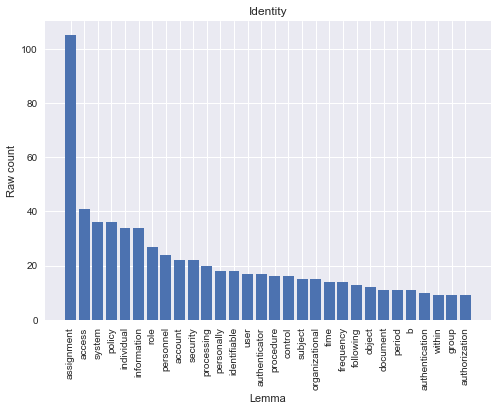

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in identity_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts)
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Identity")

#### Device

In [118]:
device_df['Control Text']= device_df['Control Text'].apply(lambda x: x.lower())
device_df['tokenized'] = device_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
device_df['stopwords_removed'] = device_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
device_df['porter_stemmed'] = device_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
device_df['msg_lemmatized'] = device_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
device_df['rejoined_stem'] = device_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
device_df['rejoined_lem'] = device_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [126]:
with open('device_text.txt', 'w') as f:
    f.write(device_df['rejoined_lem'].str.cat())

In [127]:
device_text = open('device_text.txt', encoding="utf8").read()
parsed_device_text = nlp(device_text)

device_histogram = Counter()
for token in parsed_device_text:
    original_token_text = token.orth_
    device_histogram[original_token_text] += 1
    
del device_histogram['b']
del device_histogram['c']

device_sorted_token_count_pairs = sorted(device_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in device_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 65
system : 37
access : 27
change : 18
policy : 17
control : 15
subject : 15
following : 13
component : 13
security : 12
object : 11
device : 11
remote : 11
information : 9
one : 9
automated : 9
configuration : 9
physical : 9
attribute : 7
selection : 7
frequency : 7
monitoring : 7
using : 7
mechanism : 6
unauthorized : 5
document : 5
audit : 5
accountability : 5
review : 5
assessment : 5
support : 5
specified : 4
requirement : 4
number : 4
logon : 4
use : 4
time : 4
authorized : 4
current : 4
baseline : 4
response : 4
covered : 3
within : 3
specifies : 3
granted : 3
privilege : 3
associated : 3
rule : 3
governing : 3
based : 3
mobile : 3
consecutive : 3
attempt : 3
authentication : 3
factor : 3
user : 3
monitor : 3
implementation : 3
organizational : 3
testing : 3
personnel : 3
role : 3
procedure : 3
update : 3
event : 3
action : 3
manner : 3
proposed : 3
approval : 3
approved : 3
provide : 3
software : 3
program : 3
facility : 3
indication : 3
video : 3
application : 3
c

Text(0.5, 1.0, 'Device')

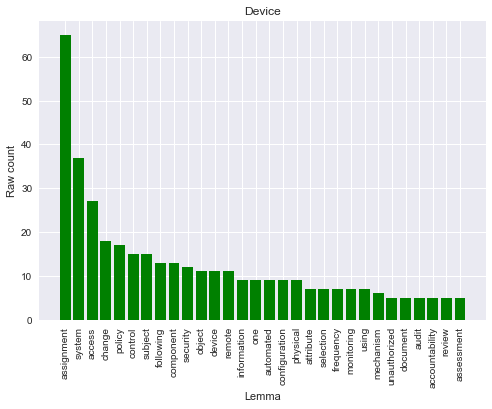

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in device_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='green')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Device")

#### Network/Environment

In [135]:
net_env_df['Control Text']= net_env_df['Control Text'].apply(lambda x: x.lower())
net_env_df['tokenized'] = net_env_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
net_env_df['stopwords_removed'] = net_env_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
net_env_df['porter_stemmed'] = net_env_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
net_env_df['msg_lemmatized'] = net_env_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
net_env_df['rejoined_stem'] = net_env_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
net_env_df['rejoined_lem'] = net_env_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [140]:
with open('net_env_text.txt', 'w') as f:
    f.write(net_env_df['rejoined_lem'].str.cat())

In [146]:
net_env_text = open('net_env_text.txt', encoding="utf8").read()
parsed_net_env_text = nlp(net_env_text)

net_env_histogram = Counter()
for token in parsed_net_env_text:
    original_token_text = token.orth_
    net_env_histogram[original_token_text] += 1

del net_env_histogram['b']

net_env_sorted_token_count_pairs = sorted(net_env_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in net_env_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 157
system : 124
information : 46
control : 42
component : 39
following : 34
security : 27
access : 25
policy : 23
selection : 22
change : 21
external : 21
type : 19
mechanism : 19
monitoring : 19
frequency : 17
cryptographic : 17
one : 16
event : 15
subject : 14
unauthorized : 14
automated : 14
using : 14
network : 13
time : 12
object : 11
communication : 11
assessment : 11
traffic : 11
within : 10
attribute : 10
support : 10
action : 10
software : 10
source : 10
key : 10
audit : 9
flow : 9
processing : 9
configuration : 9
individual : 9
use : 9
function : 9
physical : 9
internal : 9
storage : 9
rule : 8
document : 8
remote : 8
authorized : 8
organizational : 8
data : 8
accordance : 8
service : 8
managed : 8
interface : 8
exception : 8
protection : 8
c : 7
connection : 7
official : 7
logging : 7
identified : 7
continuous : 7
code : 7
prevent : 7
boundary : 7
authoritative : 7
specified : 6
session : 6
requirement : 6
identify : 6
personnel : 6
review : 6
update : 6
user :

Text(0.5, 1.0, 'Network/Environment')

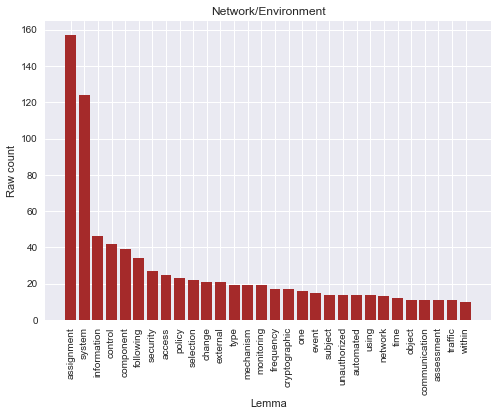

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in net_env_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='brown')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Network/Environment")

#### Application Workload

In [148]:
app_workload_df['Control Text']= app_workload_df['Control Text'].apply(lambda x: x.lower())
app_workload_df['tokenized'] = app_workload_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
app_workload_df['stopwords_removed'] = app_workload_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
app_workload_df['porter_stemmed'] = app_workload_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
app_workload_df['msg_lemmatized'] = app_workload_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
app_workload_df['rejoined_stem'] = app_workload_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
app_workload_df['rejoined_lem'] = app_workload_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

In [149]:
with open('app_workload_text.txt', 'w') as f:
    f.write(app_workload_df['rejoined_lem'].str.cat())

In [154]:
app_workload_text = open('app_workload_text.txt', encoding="utf8").read()
parsed_app_workload_text = nlp(app_workload_text)

app_workload_histogram = Counter()
for token in parsed_app_workload_text:
    original_token_text = token.orth_
    app_workload_histogram[original_token_text] += 1

del app_workload_histogram['b']
del app_workload_histogram['c']

app_workload_sorted_token_count_pairs = sorted(app_workload_histogram.items(),
                                  reverse=True,
                                  key=itemgetter(1))
for token, count in app_workload_sorted_token_count_pairs:
    print(token, ":", count)

assignment : 49
system : 38
change : 18
policy : 17
component : 17
control : 14
subject : 14
information : 13
access : 12
security : 12
object : 11
following : 11
automated : 11
configuration : 9
attribute : 7
using : 7
frequency : 6
monitoring : 6
baseline : 6
unauthorized : 5
document : 5
audit : 5
accountability : 5
assessment : 5
internal : 5
approval : 5
software : 5
specified : 4
privilege : 4
one : 4
limited : 4
personnel : 4
role : 4
compliance : 4
code : 4
source : 4
covered : 3
across : 3
specifies : 3
granted : 3
associated : 3
rule : 3
governing : 3
authentication : 3
selection : 3
procedure : 3
review : 3
update : 3
current : 3
part : 3
accuracy : 3
currency : 3
availability : 3
connection : 3
privacy : 3
requirement : 3
environment : 3
mechanism : 3
proposed : 3
approved : 3
program : 3
authorized : 3
inventory : 3
medium : 3
authorization : 2
set : 2
within : 2
changing : 2
newly : 2
created : 2
defined : 2
e : 2
revocation : 2
based : 2
used : 2
management : 2
organizat

Text(0.5, 1.0, 'Application Workload')

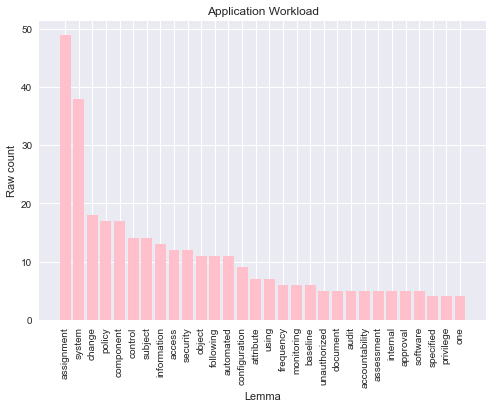

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  

num_top_lemmas_to_plot = 30
top_lemmas = [lemma for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
top_counts = [count for lemma, count in app_workload_sorted_token_count_pairs[:num_top_lemmas_to_plot]]
plt.bar(range(num_top_lemmas_to_plot), top_counts, color='pink')
plt.xticks(range(num_top_lemmas_to_plot), top_lemmas, rotation=90)
plt.xlabel('Lemma')
plt.ylabel('Raw count')
plt.title("Application Workload")

#### Data

In [168]:
data_df['Control Text']= data_df['Control Text'].apply(lambda x: x.lower())
# data_df['tokenized'] = data_df.apply(lambda x: tokenize(x['Control Text']), axis=1)
# data_df['stopwords_removed'] = data_df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
# data_df['porter_stemmed'] = data_df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
# data_df['msg_lemmatized'] = data_df['stopwords_removed'].apply(lambda x: lemmatizer(x))
# data_df['rejoined_stem'] = data_df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
# data_df['rejoined_lem'] = data_df.apply(lambda x: rejoin_words(x['msg_lemmatized']), axis=1)

AttributeError: 'float' object has no attribute 'lower'

In [162]:
device_df

,Control Text,tokenized,stopwords_removed,porter_stemmed,msg_lemmatized,rejoined_stem,rejoined_lem
16,enforce [assignment: organization-defined mand...,"[enforce, assignment, mandatory, access, contr...","[enforce, assignment, mandatory, access, contr...","[enforc, assign, mandatori, access, control, p...","[enforce, assignment, mandatory, access, contr...",enforc assign mandatori access control polici ...,enforce assignment mandatory access control po...
17,enforce [assignment: organization-defined disc...,"[enforce, assignment, discretionary, access, c...","[enforce, assignment, discretionary, access, c...","[enforc, assign, discretionari, access, contro...","[enforce, assignment, discretionary, access, c...",enforc assign discretionari access control pol...,enforce assignment discretionary access contro...
20,enforce the revocation of access authorization...,"[enforce, the, revocation, of, access, authori...","[enforce, revocation, access, authorizations, ...","[enforc, revoc, access, author, result, chang,...","[enforce, revocation, access, authorization, r...",enforc revoc access author result chang secur ...,enforce revocation access authorization result...
25,enforce attribute-based access control policy ...,"[enforce, access, control, policy, over, defin...","[enforce, access, control, policy, defined, su...","[enforc, access, control, polici, defin, subje...","[enforce, access, control, policy, defined, su...",enforc access control polici defin subject obj...,enforce access control policy defined subject ...
72,purge or wipe information from [assignment: or...,"[purge, or, wipe, information, from, assignmen...","[purge, wipe, information, assignment, mobile,...","[purg, wipe, inform, assign, mobil, devic, bas...","[purge, wipe, information, assignment, mobile,...",purg wipe inform assign mobil devic base assig...,purge wipe information assignment mobile devic...
73,limit the number of unsuccessful biometric log...,"[limit, the, number, of, unsuccessful, biometr...","[limit, number, unsuccessful, biometric, logon...","[limit, number, unsuccess, biometr, logon, att...","[limit, number, unsuccessful, biometric, logon...",limit number unsuccess biometr logon attempt a...,limit number unsuccessful biometric logon atte...
74,(a) allow the use of [assignment: organization...,"[a, allow, the, use, of, assignment, authentic...","[allow, use, assignment, authentication, facto...","[allow, use, assign, authent, factor, differ, ...","[allow, use, assignment, authentication, facto...",allow use assign authent factor differ primari...,allow use assignment authentication factor dif...
83,"conceal, via the device lock, information prev...","[conceal, via, the, device, lock, information,...","[conceal, via, device, lock, information, prev...","[conceal, via, devic, lock, inform, previous, ...","[conceal, via, device, lock, information, prev...",conceal via devic lock inform previous visibl ...,conceal via device lock information previously...
85,provide a logout capability for user-initiated...,"[provide, a, logout, capability, for, communic...","[provide, logout, capability, communications, ...","[provid, logout, capabl, commun, session, when...","[provide, logout, capability, communication, s...",provid logout capabl commun session whenev aut...,provide logout capability communication sessio...
101,employ automated mechanisms to monitor and con...,"[employ, automated, mechanisms, to, monitor, a...","[employ, automated, mechanisms, monitor, contr...","[employ, autom, mechan, monitor, control, remo...","[employ, automated, mechanism, monitor, contro...",employ autom mechan monitor control remot acce...,employ automated mechanism monitor control rem...
